In [12]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
len(dir(plt))

257

## 1. matplotlib.pyplot.acorr(x, hold=None, data=None, **kwargs)
Plot the [autocorrelation](https://en.wikipedia.org/wiki/Autocorrelation) of x.

自相关性是指随机误差项的各期望值之间存在着相关关系，称随机误差项之间存在自相关性（autocorrelation）或序列相关.

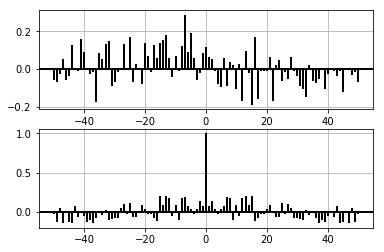

In [4]:
np.random.seed(0)

x, y = np.random.randn(2, 100)
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.xcorr(x, y, usevlines=True, maxlags=50, normed=True, lw=2)
ax1.grid(True)
ax1.axhline(0, color='black', lw=2)

ax2 = fig.add_subplot(212, sharex=ax1)
ax2.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
ax2.grid(True)
ax2.axhline(0, color='black', lw=2)

plt.show()

## 2. matplotlib.pyplot.angle_spectrum(x, Fs=None, Fc=None, window=None, pad_to=None, sides=None, hold=None, data=None, **kwargs)
绘制角谱。

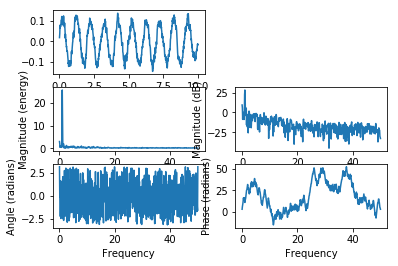

In [6]:
np.random.seed(0)

dt = 0.01
Fs = 1/dt
t = np.arange(0, 10, dt)
nse = np.random.randn(len(t))
r = np.exp(-t/0.05)

cnse = np.convolve(nse, r)*dt
cnse = cnse[:len(t)]
s = 0.1*np.sin(2*np.pi*t) + cnse

plt.subplot(3, 2, 1)
plt.plot(t, s)

plt.subplot(3, 2, 3)
plt.magnitude_spectrum(s, Fs=Fs)

plt.subplot(3, 2, 4)
plt.magnitude_spectrum(s, Fs=Fs, scale='dB')

plt.subplot(3, 2, 5)
plt.angle_spectrum(s, Fs=Fs)

plt.subplot(3, 2, 6)
plt.phase_spectrum(s, Fs=Fs)

plt.show()

## 3. matplotlib.pyplot.annotate(*args, **kwargs)
注释点xy

## 4. matplotlib.pyplot.arrow(x, y, dx, dy, hold=None, **kwargs)
给轴上添加箭头

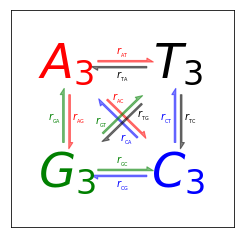

In [7]:
import matplotlib.pyplot as plt
import numpy as np

rates_to_bases = {'r1': 'AT', 'r2': 'TA', 'r3': 'GA', 'r4': 'AG', 'r5': 'CA',
                  'r6': 'AC', 'r7': 'GT', 'r8': 'TG', 'r9': 'CT', 'r10': 'TC',
                  'r11': 'GC', 'r12': 'CG'}
numbered_bases_to_rates = dict([(v, k) for k, v in rates_to_bases.items()])
lettered_bases_to_rates = dict([(v, 'r' + v) for k, v in rates_to_bases.items()])


def add_dicts(d1, d2):
    """Adds two dicts and returns the result."""
    result = d1.copy()
    result.update(d2)
    return result


def make_arrow_plot(data, size=4, display='length', shape='right',
                    max_arrow_width=0.03, arrow_sep=0.02, alpha=0.5,
                    normalize_data=False, ec=None, labelcolor=None,
                    head_starts_at_zero=True, rate_labels=lettered_bases_to_rates,
                    **kwargs):
    """Makes an arrow plot.

    Parameters:

    data: dict with probabilities for the bases and pair transitions.
    size: size of the graph in inches.
    display: 'length', 'width', or 'alpha' for arrow property to change.
    shape: 'full', 'left', or 'right' for full or half arrows.
    max_arrow_width: maximum width of an arrow, data coordinates.
    arrow_sep: separation between arrows in a pair, data coordinates.
    alpha: maximum opacity of arrows, default 0.8.

    **kwargs can be anything allowed by a Arrow object, e.g.
    linewidth and edgecolor.
    """

    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.gcf().set_size_inches(size, size)
    plt.xticks([])
    plt.yticks([])
    max_text_size = size*12
    min_text_size = size
    label_text_size = size*2.5
    text_params = {'ha': 'center', 'va': 'center', 'family': 'sans-serif',
                   'fontweight': 'bold'}
    r2 = np.sqrt(2)

    deltas = {
        'AT': (1, 0),
        'TA': (-1, 0),
        'GA': (0, 1),
        'AG': (0, -1),
        'CA': (-1/r2, 1/r2),
        'AC': (1/r2, -1/r2),
        'GT': (1/r2, 1/r2),
        'TG': (-1/r2, -1/r2),
        'CT': (0, 1),
        'TC': (0, -1),
        'GC': (1, 0),
        'CG': (-1, 0)
        }

    colors = {
        'AT': 'r',
        'TA': 'k',
        'GA': 'g',
        'AG': 'r',
        'CA': 'b',
        'AC': 'r',
        'GT': 'g',
        'TG': 'k',
        'CT': 'b',
        'TC': 'k',
        'GC': 'g',
        'CG': 'b'
        }

    label_positions = {
        'AT': 'center',
        'TA': 'center',
        'GA': 'center',
        'AG': 'center',
        'CA': 'left',
        'AC': 'left',
        'GT': 'left',
        'TG': 'left',
        'CT': 'center',
        'TC': 'center',
        'GC': 'center',
        'CG': 'center'
        }

    def do_fontsize(k):
        return float(np.clip(max_text_size*np.sqrt(data[k]),
                          min_text_size, max_text_size))

    A = plt.text(0, 1, '$A_3$', color='r', size=do_fontsize('A'), **text_params)
    T = plt.text(1, 1, '$T_3$', color='k', size=do_fontsize('T'), **text_params)
    G = plt.text(0, 0, '$G_3$', color='g', size=do_fontsize('G'), **text_params)
    C = plt.text(1, 0, '$C_3$', color='b', size=do_fontsize('C'), **text_params)

    arrow_h_offset = 0.25  # data coordinates, empirically determined
    max_arrow_length = 1 - 2*arrow_h_offset

    max_arrow_width = max_arrow_width
    max_head_width = 2.5*max_arrow_width
    max_head_length = 2*max_arrow_width
    arrow_params = {'length_includes_head': True, 'shape': shape,
                    'head_starts_at_zero': head_starts_at_zero}
    ax = plt.gca()
    sf = 0.6  # max arrow size represents this in data coords

    d = (r2/2 + arrow_h_offset - 0.5)/r2  # distance for diags
    r2v = arrow_sep/r2  # offset for diags

    # tuple of x, y for start position
    positions = {
        'AT': (arrow_h_offset, 1 + arrow_sep),
        'TA': (1 - arrow_h_offset, 1 - arrow_sep),
        'GA': (-arrow_sep, arrow_h_offset),
        'AG': (arrow_sep, 1 - arrow_h_offset),
        'CA': (1 - d - r2v, d - r2v),
        'AC': (d + r2v, 1 - d + r2v),
        'GT': (d - r2v, d + r2v),
        'TG': (1 - d + r2v, 1 - d - r2v),
        'CT': (1 - arrow_sep, arrow_h_offset),
        'TC': (1 + arrow_sep, 1 - arrow_h_offset),
        'GC': (arrow_h_offset, arrow_sep),
        'CG': (1 - arrow_h_offset, -arrow_sep),
        }

    if normalize_data:
        # find maximum value for rates, i.e. where keys are 2 chars long
        max_val = 0
        for k, v in data.items():
            if len(k) == 2:
                max_val = max(max_val, v)
        # divide rates by max val, multiply by arrow scale factor
        for k, v in data.items():
            data[k] = v/max_val*sf

    def draw_arrow(pair, alpha=alpha, ec=ec, labelcolor=labelcolor):
        # set the length of the arrow
        if display == 'length':
            length = max_head_length + data[pair]/sf*(max_arrow_length -
                                                      max_head_length)
        else:
            length = max_arrow_length
        # set the transparency of the arrow
        if display == 'alph':
            alpha = min(data[pair]/sf, alpha)
        else:
            alpha = alpha
        # set the width of the arrow
        if display == 'width':
            scale = data[pair]/sf
            width = max_arrow_width*scale
            head_width = max_head_width*scale
            head_length = max_head_length*scale
        else:
            width = max_arrow_width
            head_width = max_head_width
            head_length = max_head_length

        fc = colors[pair]
        ec = ec or fc

        x_scale, y_scale = deltas[pair]
        x_pos, y_pos = positions[pair]
        plt.arrow(x_pos, y_pos, x_scale*length, y_scale*length,
              fc=fc, ec=ec, alpha=alpha, width=width, head_width=head_width,
              head_length=head_length, **arrow_params)

        # figure out coordinates for text
        # if drawing relative to base: x and y are same as for arrow
        # dx and dy are one arrow width left and up
        # need to rotate based on direction of arrow, use x_scale and y_scale
        # as sin x and cos x?
        sx, cx = y_scale, x_scale

        where = label_positions[pair]
        if where == 'left':
            orig_position = 3*np.array([[max_arrow_width, max_arrow_width]])
        elif where == 'absolute':
            orig_position = np.array([[max_arrow_length/2.0, 3*max_arrow_width]])
        elif where == 'right':
            orig_position = np.array([[length - 3*max_arrow_width,
                                    3*max_arrow_width]])
        elif where == 'center':
            orig_position = np.array([[length/2.0, 3*max_arrow_width]])
        else:
            raise ValueError("Got unknown position parameter %s" % where)

        M = np.array([[cx, sx], [-sx, cx]])
        coords = np.dot(orig_position, M) + [[x_pos, y_pos]]
        x, y = np.ravel(coords)
        orig_label = rate_labels[pair]
        label = '$%s_{_{\mathrm{%s}}}$' % (orig_label[0], orig_label[1:])

        plt.text(x, y, label, size=label_text_size, ha='center', va='center',
             color=labelcolor or fc)

    for p in sorted(positions):
        draw_arrow(p)

# test data
all_on_max = dict([(i, 1) for i in 'TCAG'] +
                  [(i + j, 0.6) for i in 'TCAG' for j in 'TCAG'])

realistic_data = {
    'A': 0.4,
    'T': 0.3,
    'G': 0.5,
    'C': 0.2,
    'AT': 0.4,
    'AC': 0.3,
    'AG': 0.2,
    'TA': 0.2,
    'TC': 0.3,
    'TG': 0.4,
    'CT': 0.2,
    'CG': 0.3,
    'CA': 0.2,
    'GA': 0.1,
    'GT': 0.4,
    'GC': 0.1,
    }

extreme_data = {
    'A': 0.75,
    'T': 0.10,
    'G': 0.10,
    'C': 0.05,
    'AT': 0.6,
    'AC': 0.3,
    'AG': 0.1,
    'TA': 0.02,
    'TC': 0.3,
    'TG': 0.01,
    'CT': 0.2,
    'CG': 0.5,
    'CA': 0.2,
    'GA': 0.1,
    'GT': 0.4,
    'GC': 0.2,
    }

sample_data = {
    'A': 0.2137,
    'T': 0.3541,
    'G': 0.1946,
    'C': 0.2376,
    'AT': 0.0228,
    'AC': 0.0684,
    'AG': 0.2056,
    'TA': 0.0315,
    'TC': 0.0629,
    'TG': 0.0315,
    'CT': 0.1355,
    'CG': 0.0401,
    'CA': 0.0703,
    'GA': 0.1824,
    'GT': 0.0387,
    'GC': 0.1106,
    }


if __name__ == '__main__':
    from sys import argv
    d = None
    if len(argv) > 1:
        if argv[1] == 'full':
            d = all_on_max
            scaled = False
        elif argv[1] == 'extreme':
            d = extreme_data
            scaled = False
        elif argv[1] == 'realistic':
            d = realistic_data
            scaled = False
        elif argv[1] == 'sample':
            d = sample_data
            scaled = True
    if d is None:
        d = all_on_max
        scaled = False
    if len(argv) > 2:
        display = argv[2]
    else:
        display = 'length'

    size = 4
    plt.figure(figsize=(size, size))

    make_arrow_plot(d, display=display, linewidth=0.001, edgecolor=None,
                    normalize_data=scaled, head_starts_at_zero=True, size=size)

    plt.draw()

    plt.show()

## 5. matplotlib.pyplot.autoscale(enable=True, axis='both', tight=None)
Autoscale the axis view to the data (toggle)

## 6. matplotlib.pyplot.autumn()
set the default colormap to autumn and apply to current image if any. See help(colormaps) for more information.

## 7. matplotlib.pyplot.axes(*args, **kwargs)
Add an axes to the figure.

## 8. matplotlib.pyplot.axhline(y=0, xmin=0, xmax=1, hold=None, **kwargs)
Add a horizontal line across the axis.

## 9. matplotlib.pyplot.axhspan(ymin, ymax, xmin=0, xmax=1, hold=None, **kwargs)
Add a horizontal span (rectangle) across the axis.

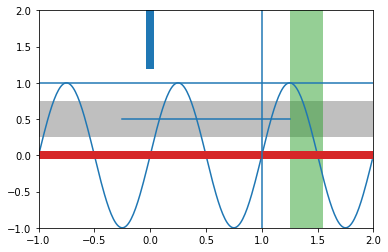

In [8]:
t = np.arange(-1, 2, .01)
s = np.sin(2*np.pi*t)

plt.plot(t, s)
# draw a thick red hline at y=0 that spans the xrange
l = plt.axhline(linewidth=8, color='#d62728')

# draw a default hline at y=1 that spans the xrange
l = plt.axhline(y=1)

# draw a default vline at x=1 that spans the yrange
l = plt.axvline(x=1)

# draw a thick blue vline at x=0 that spans the upper quadrant of
# the yrange
l = plt.axvline(x=0, ymin=0.75, linewidth=8, color='#1f77b4')

# draw a default hline at y=.5 that spans the middle half of
# the axes
l = plt.axhline(y=.5, xmin=0.25, xmax=0.75)

p = plt.axhspan(0.25, 0.75, facecolor='0.5', alpha=0.5)

p = plt.axvspan(1.25, 1.55, facecolor='#2ca02c', alpha=0.5)

plt.axis([-1, 2, -1, 2])


plt.show()


## 10. matplotlib.pyplot.axis(*v, **kwargs)
Convenience method to get or set axis properties.

## 11. matplotlib.pyplot.axvline(x=0, ymin=0, ymax=1, hold=None, **kwargs)
Add a vertical line across the axes.

## 12. matplotlib.pyplot.axvspan(xmin, xmax, ymin=0, ymax=1, hold=None, **kwargs)
Add a vertical span (rectangle) across the axes.

## 13. matplotlib.pyplot.bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
Make a bar plot.

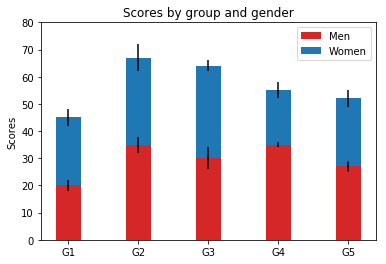

In [9]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='#d62728', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

## 14. matplotlib.pyplot.barbs(*args, **kw)
Plot a 2-D field of barbs

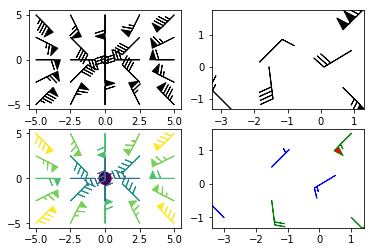

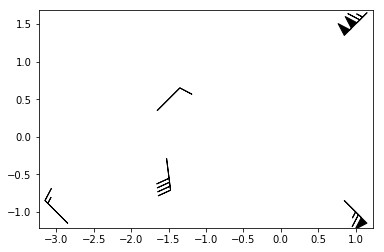

In [10]:
x = np.linspace(-5, 5, 5)
X, Y = np.meshgrid(x, x)
U, V = 12*X, 12*Y

data = [(-1.5, .5, -6, -6),
        (1, -1, -46, 46),
        (-3, -1, 11, -11),
        (1, 1.5, 80, 80),
        (0.5, 0.25, 25, 15),
        (-1.5, -0.5, -5, 40)]

data = np.array(data, dtype=[('x', np.float32), ('y', np.float32),
                             ('u', np.float32), ('v', np.float32)])

# Default parameters, uniform grid
ax = plt.subplot(2, 2, 1)
ax.barbs(X, Y, U, V)

# Arbitrary set of vectors, make them longer and change the pivot point
#(point around which they're rotated) to be the middle
ax = plt.subplot(2, 2, 2)
ax.barbs(data['x'], data['y'], data['u'], data['v'], length=8, pivot='middle')

# Showing colormapping with uniform grid.  Fill the circle for an empty barb,
# don't round the values, and change some of the size parameters
ax = plt.subplot(2, 2, 3)
ax.barbs(X, Y, U, V, np.sqrt(U*U + V*V), fill_empty=True, rounding=False,
         sizes=dict(emptybarb=0.25, spacing=0.2, height=0.3))

# Change colors as well as the increments for parts of the barbs
ax = plt.subplot(2, 2, 4)
ax.barbs(data['x'], data['y'], data['u'], data['v'], flagcolor='r',
         barbcolor=['b', 'g'], barb_increments=dict(half=10, full=20, flag=100),
         flip_barb=True)

# Masked arrays are also supported
masked_u = np.ma.masked_array(data['u'])
masked_u[4] = 1000  # Bad value that should not be plotted when masked
masked_u[4] = np.ma.masked

# Identical plot to panel 2 in the first figure, but with the point at
#(0.5, 0.25) missing (masked)
fig2 = plt.figure()
ax = fig2.add_subplot(1, 1, 1)
ax.barbs(data['x'], data['y'], masked_u, data['v'], length=8, pivot='middle')

plt.show()

## 15. matplotlib.pyplot.barh(bottom, width, height=0.8, left=None, hold=None, **kwargs)
Make a horizontal bar plot.

## 16. matplotlib.pyplot.bone()
set the default colormap to bone and apply to current image if any. See help(colormaps) for more information

## 17. matplotlib.pyplot.box(on=None)
Turn the axes box on or off. on may be a boolean or a string, ‘on’ or ‘off’.

If on is None, toggle state.

## 18. matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_xticks=True, autorange=False, zorder=None, hold=None, data=None)
Make a box and whisker plot.

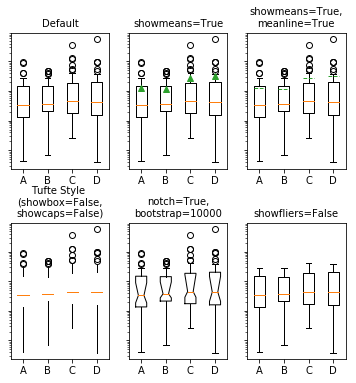

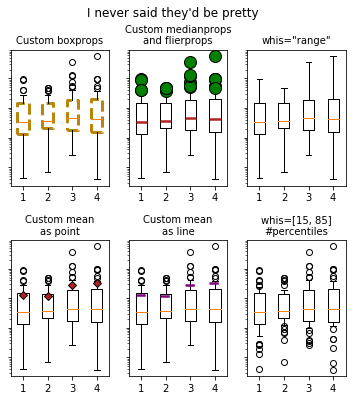

In [11]:
# fake data
np.random.seed(937)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = list('ABCD')
fs = 10  # fontsize

# demonstrate how to toggle the display of different elements:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=True)
axes[0, 0].boxplot(data, labels=labels)
axes[0, 0].set_title('Default', fontsize=fs)

axes[0, 1].boxplot(data, labels=labels, showmeans=True)
axes[0, 1].set_title('showmeans=True', fontsize=fs)

axes[0, 2].boxplot(data, labels=labels, showmeans=True, meanline=True)
axes[0, 2].set_title('showmeans=True,\nmeanline=True', fontsize=fs)

axes[1, 0].boxplot(data, labels=labels, showbox=False, showcaps=False)
tufte_title = 'Tufte Style \n(showbox=False,\nshowcaps=False)'
axes[1, 0].set_title(tufte_title, fontsize=fs)

axes[1, 1].boxplot(data, labels=labels, notch=True, bootstrap=10000)
axes[1, 1].set_title('notch=True,\nbootstrap=10000', fontsize=fs)

axes[1, 2].boxplot(data, labels=labels, showfliers=False)
axes[1, 2].set_title('showfliers=False', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.subplots_adjust(hspace=0.4)
plt.show()


# demonstrate how to customize the display different elements:
boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=True)
axes[0, 0].boxplot(data, boxprops=boxprops)
axes[0, 0].set_title('Custom boxprops', fontsize=fs)

axes[0, 1].boxplot(data, flierprops=flierprops, medianprops=medianprops)
axes[0, 1].set_title('Custom medianprops\nand flierprops', fontsize=fs)

axes[0, 2].boxplot(data, whis='range')
axes[0, 2].set_title('whis="range"', fontsize=fs)

axes[1, 0].boxplot(data, meanprops=meanpointprops, meanline=False,
                   showmeans=True)
axes[1, 0].set_title('Custom mean\nas point', fontsize=fs)

axes[1, 1].boxplot(data, meanprops=meanlineprops, meanline=True,
                   showmeans=True)
axes[1, 1].set_title('Custom mean\nas line', fontsize=fs)

axes[1, 2].boxplot(data, whis=[15, 85])
axes[1, 2].set_title('whis=[15, 85]\n#percentiles', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.suptitle("I never said they'd be pretty")
fig.subplots_adjust(hspace=0.4)
plt.show()

## 19. matplotlib.pyplot.quiver(*args, **kw)

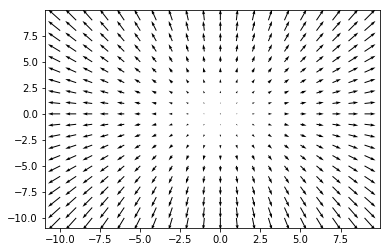

In [13]:
X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()